## **Capacitação de Visualiazação para a área de Dev**

### **Autora:**
- Erica Ferreira - [erica.ferreira@poli.ufrj.br](mailto:erica.ferreira@poli.ufrj.br)

### **Fontes**:

- [Paleta Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [Roda de Cores](https://coolors.co/palettes/trending)
- [Escolhendo o gráfico](https://www.data-to-viz.com/)
- [Documentação Matploltlib](https://matplotlib.org/)
- [Documentação Seaborn](https://seaborn.pydata.org/)
- [Livro de Visualização](https://clauswilke.com/dataviz/index.html)
- [Dataset Utilizado](https://www.kaggle.com/datasets/datahackers/state-of-data-2021)

<hr>

### Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lendo os dados

In [140]:
df = pd.read_csv('../data/State_of_Data_2021.csv')

C:\Users\erica\AppData\Local\Temp\ipykernel_13700\1059990348.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/State_of_Data_2021.csv')


### Processamento dos dados

In [141]:
# Vendo as colunas
df.columns

Index(['('P0', 'id')', '('P1_a ', 'Idade')', '('P1_a_a ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_e ', 'Estado onde mora')',
       '('P1_e_a ', 'uf onde mora')', '('P1_e_b ', 'Regiao onde mora')',
       '('P1_g_b ', 'Regiao de origem')', '('P1_g_c ', 'Mudou de Estado?')',
       '('P1_h ', 'Nivel de Ensino')',
       ...
       '('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')',
       '('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')',
       '('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')',
       '('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')',
       '('P9_a_a ', 'Blog/Medium do Data Hackers')',
       '('P9_a_b ', 'Podcast do Data Hackers')',
       '('P9_a_d ', 'Newsletter Semanal')', '('P9_a_e ', 'Canal do Slack')',
       '('P9_a_f ', 'Canal do Youtube do Data Hackers')',
     

In [142]:
# Formatando o nome das colunas
df.columns = [x.split(', ')[1].replace("'",'').replace(')','') for x in df.columns.tolist()]

In [143]:
# Colunas depois da formatação
df.columns

Index(['id', 'Idade', 'Faixa idade', 'Genero', 'Estado onde mora',
       'uf onde mora', 'Regiao onde mora', 'Regiao de origem',
       'Mudou de Estado?', 'Nivel de Ensino',
       ...
       'Criando e dando manutenção em ETLs',
       'Criando e gerenciando soluções de Feature Store e cultura de MLOps.',
       'Criando e mantendo a infra que meus modelos e soluções rodam (clusters',
       'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?',
       'Blog/Medium do Data Hackers', 'Podcast do Data Hackers',
       'Newsletter Semanal', 'Canal do Slack',
       'Canal do Youtube do Data Hackers',
       'Ainda não conhecia o Data Hackers'],
      dtype='object', length=356)

In [144]:
# Agrupando por Faixa Salarial e Gênero
df_agrupado = (df.groupby(['Faixa salarial','Genero'])['id']
                .count()
                .reset_index()
              ).rename(columns = {'id':'Absoluto'})

df_agrupado.head()

,Faixa salarial,Genero,Absoluto
0,Acima de R$ 40.001/mês,Feminino,3
1,Acima de R$ 40.001/mês,Masculino,31
2,Menos de R$ 1.000/mês,Feminino,5
3,Menos de R$ 1.000/mês,Masculino,27
4,de R$ 1.001/mês a R$ 2.000/mês,Feminino,23


In [145]:
# Criando porcentagem de gênero por faixa salarial
for genero in df_agrupado['Genero'].unique().tolist():

    df_filtrado = df_agrupado[df_agrupado['Genero'] == genero]

    # Calcula a porcentagem de cada gênero por faixa salarial
    df_agrupado.loc[df_agrupado['Genero'] == genero,'Porcentagem'] = df_filtrado.Absoluto * 100 / df_filtrado.Absoluto.sum()

df_agrupado

,Faixa salarial,Genero,Absoluto,Porcentagem
0,Acima de R$ 40.001/mês,Feminino,3,0.688073
1,Acima de R$ 40.001/mês,Masculino,31,1.611227
2,Menos de R$ 1.000/mês,Feminino,5,1.146789
3,Menos de R$ 1.000/mês,Masculino,27,1.403326
4,de R$ 1.001/mês a R$ 2.000/mês,Feminino,23,5.275229
5,de R$ 1.001/mês a R$ 2.000/mês,Masculino,102,5.301455
6,de R$ 1.001/mês a R$ 2.000/mês,Outro,1,20.000000
7,de R$ 12.001/mês a R$ 16.000/mês,Feminino,34,7.798165
8,de R$ 12.001/mês a R$ 16.000/mês,Masculino,229,11.902287
9,de R$ 16.001/mês a R$ 20.000/mês,Feminino,16,3.669725


In [146]:
# Salvando arquivo
df_agrupado.to_csv('../data/State_of_Data_2021_filtrado.csv')

### Visualização

#### .0 Lendo arquivo

In [247]:
df_agrupado = pd.read_csv('../data/State_of_Data_2021_filtrado.csv')

#### .1 Direto da Caixa

Sem fazer nenhuma alteração no gráfico, será que fica bom?

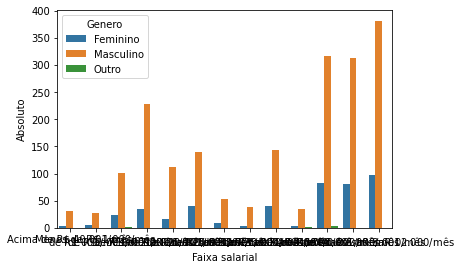

In [182]:
sns.barplot(x="Faixa salarial",
            y="Absoluto",
            hue="Genero",
            data=df_agrupado)
plt.show()

Não ficou bom. Não dá para ler o eixo x, e agora?

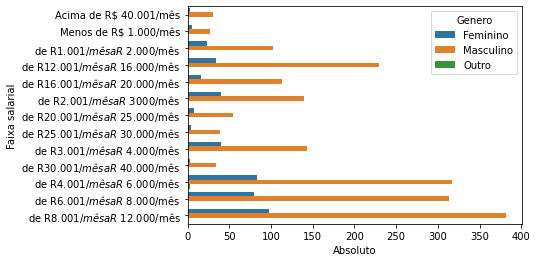

In [183]:
sns.barplot(y="Faixa salarial",
            x="Absoluto",
            hue="Genero",
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)
plt.show()

#### .2 Mudando os valores do eixo Y
Os valores da faixa salarial estão dificultando a leitura, é muito texto, vamos diminuir isso.

In [248]:
# Dando uma olhada no texto da Faixa salarial
df_agrupado['Faixa salarial'].unique()

array(['Acima de R$ 40.001/mês', 'Menos de R$ 1.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês',
       'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês',
       'de R$ 2.001/mês a R$ 3000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês',
       'de R$ 25.001/mês a R$ 30.000/mês',
       'de R$ 3.001/mês a R$ 4.000/mês',
       'de R$ 30.001/mês a R$ 40.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês'], dtype=object)

In [249]:
# Substituindo o texto da Faixa salarial
mapper = {'Acima de R$ 40.001/mês':'>40k', 
          'Menos de R$ 1.000/mês':'<1k',
          'de R$ 1.001/mês a R$ 2.000/mês':'1k-2k',
          'de R$ 12.001/mês a R$ 16.000/mês':'12k-16k',
          'de R$ 16.001/mês a R$ 20.000/mês':'16k-20k',
          'de R$ 2.001/mês a R$ 3000/mês':'2k-3k',
          'de R$ 20.001/mês a R$ 25.000/mês':'20k-30k',
          'de R$ 25.001/mês a R$ 30.000/mês':'25k-30k',
          'de R$ 3.001/mês a R$ 4.000/mês':'3k-4k',
          'de R$ 30.001/mês a R$ 40.000/mês':'30k-40k',
          'de R$ 4.001/mês a R$ 6.000/mês':'4k-6k', 
          'de R$ 6.001/mês a R$ 8.000/mês':'6k-8k',
          'de R$ 8.001/mês a R$ 12.000/mês':'8k-12k'}

df_agrupado['Faixa salarial'] = df_agrupado['Faixa salarial'].map(mapper)

df_agrupado

,Unnamed: 0,Faixa salarial,Genero,Absoluto,Porcentagem
0,0,>40k,Feminino,3,0.688073
1,1,>40k,Masculino,31,1.611227
2,2,<1k,Feminino,5,1.146789
3,3,<1k,Masculino,27,1.403326
4,4,1k-2k,Feminino,23,5.275229
5,5,1k-2k,Masculino,102,5.301455
6,6,1k-2k,Outro,1,20.000000
7,7,12k-16k,Feminino,34,7.798165
8,8,12k-16k,Masculino,229,11.902287
9,9,16k-20k,Feminino,16,3.669725


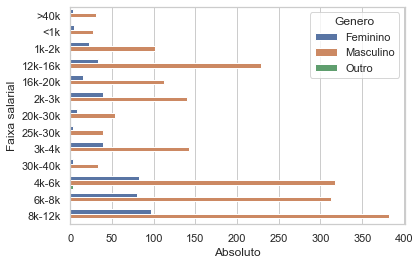

In [250]:
sns.barplot(y="Faixa salarial",
            x="Absoluto",
            hue="Genero",
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)
plt.show()

#### .3 Mudando variável numérica

Será que ver o número absoluto de cada gênero é o melhor a se fazer? Será que a distribuição é parecida para fazer essa comparação?

In [251]:
df_agrupado[df_agrupado['Genero'] == 'Outro']['Absoluto'].sum()

5

- Mulheres - 436
- Homens   - 1924
- Outro    - 5

É muita diferença! Não tem como comparar os números absolutos. O que fazemos agora?

- Para resolver a questão da distribuição, vamos usar a porcentagem (que já foi calculada no processamento)

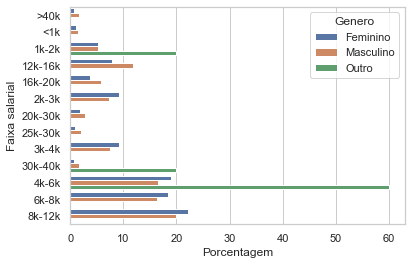

In [252]:
sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)
plt.show()

Ficou melhor mas a coluna `Outro` está com muita diferença! É porque só temos 5 casos, como temos muito pouco, vamos tirar esses dados.

In [253]:
df_agrupado = df_agrupado[df_agrupado.Genero != 'Outro']

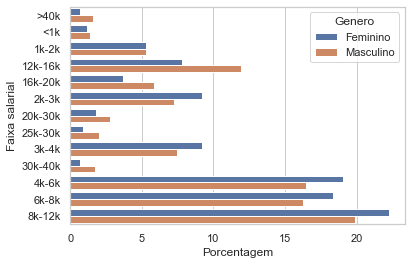

In [254]:
sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)
plt.show()

#### .4 Mudando os eixos

Poxa, ficou muito melhor! Mas o eixo y está fora de ordem, vamos ajeitar isso? Mas como?

In [258]:
ordem =  ['>40k',
          '30k-40k',
          '25k-30k',
          '16k-20k',
          '12k-16k',
          '20k-30k',
          '8k-12k',
          '6k-8k',
          '4k-6k',
          '3k-4k',
          '2k-3k',
          '1k-2k',
          '<1k']

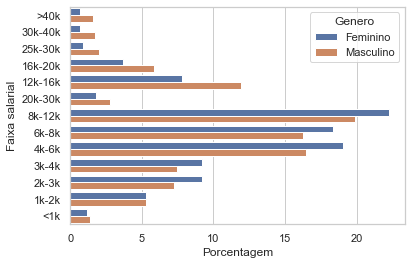

In [259]:
sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            order = ordem,
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)
plt.show()

Agora sim! Mas poxa, o nome desses eixos estão um pouco estranhos?`Faixa salarial` está em qual moeda? `Porcentagem` solta está estranho e não tem um título! Vamos mudar isso!

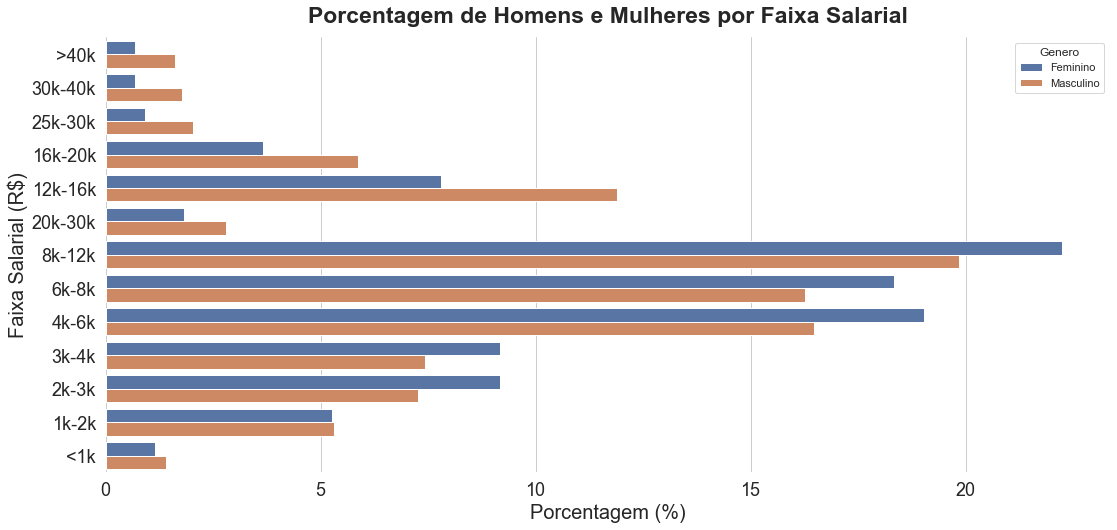

In [267]:
fig = plt.figure(figsize=(18, 8))

sns.set(style='whitegrid')

ax = sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            order=ordem,
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)

plt.ylabel('Faixa Salarial (R$)',fontsize = 20)
plt.xlabel('Porcentagem (%)',fontsize = 20)

plt.title('Porcentagem de Homens e Mulheres por Faixa Salarial',
          fontsize= 23,
          fontweight = 'bold',
          y=1.02)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Sós mostrando que dá para tirar os eixos
sns.despine(left=True, bottom=True)

plt.show()

#### .5 Mudando Legenda

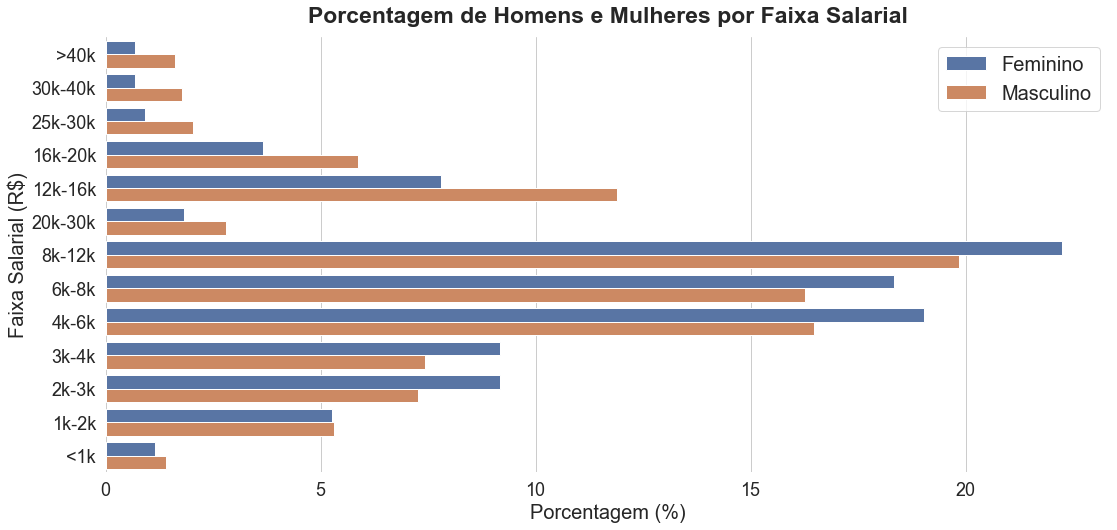

In [277]:
fig = plt.figure(figsize=(18, 8))

sns.set(style='whitegrid')

ax = sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            order=ordem,
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)

plt.ylabel('Faixa Salarial (R$)',fontsize = 20)
plt.xlabel('Porcentagem (%)',fontsize = 20)

plt.title('Porcentagem de Homens e Mulheres por Faixa Salarial',
          fontsize= 23,
          fontweight = 'bold',
          y=1.02)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Sós mostrando que dá para tirar os eixos
sns.despine(left=True, bottom=True)

plt.legend(fontsize = 20)

plt.show()

#### .6 Escolhendo as cores

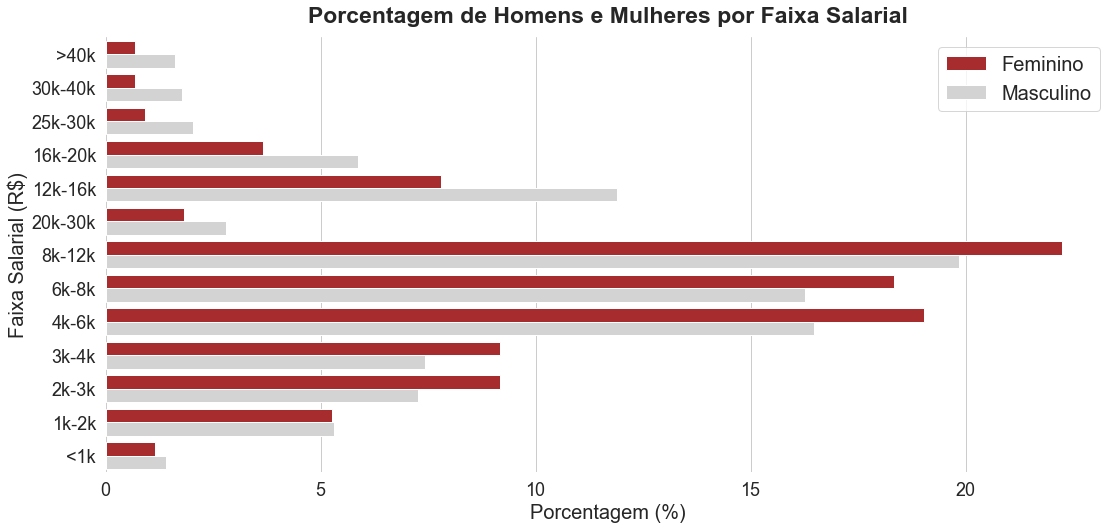

In [278]:
fig = plt.figure(figsize=(18, 8))

sns.set(style='whitegrid')

ax = sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            order=ordem,
            palette = {'Feminino':'#BA181B','Masculino':'#D3D3D3'},
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)

plt.ylabel('Faixa Salarial (R$)',fontsize = 20)
plt.xlabel('Porcentagem (%)',fontsize = 20)

plt.title('Porcentagem de Homens e Mulheres por Faixa Salarial',
          fontsize= 23,
          fontweight = 'bold',
          y=1.02)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Sós mostrando que dá para tirar os eixos
sns.despine(left=True, bottom=True)

plt.legend(fontsize = 20)

plt.show()

#### .7 Salvando a imagem

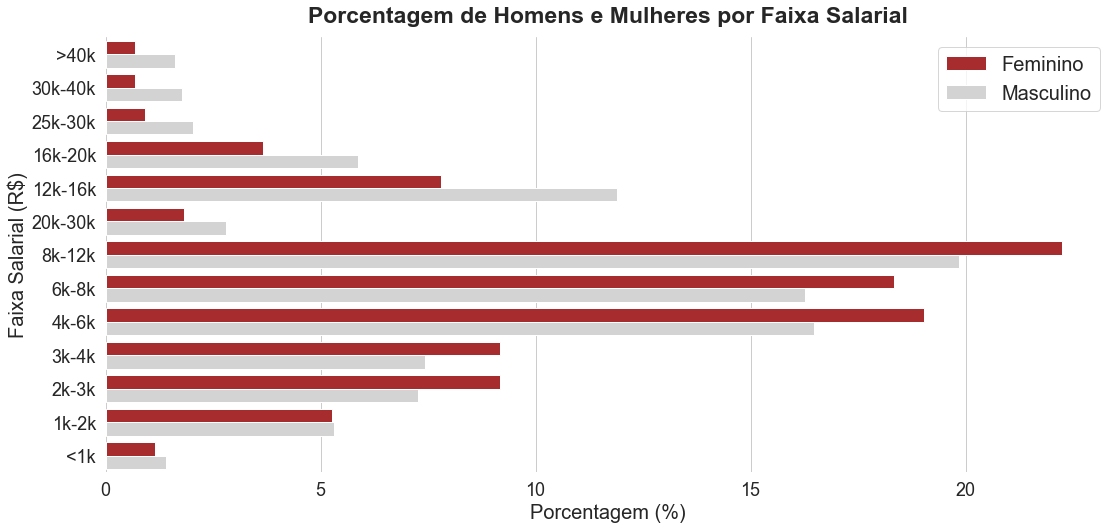

In [281]:
fig = plt.figure(figsize=(18, 8))

sns.set(style='whitegrid')

ax = sns.barplot(y="Faixa salarial",
            x="Porcentagem",
            hue="Genero",
            order=ordem,
            palette = {'Feminino':'#BA181B','Masculino':'#D3D3D3'},
            orient = 'h', # Mudamos a orientação para 'horizontal'
            data=df_agrupado)

plt.ylabel('Faixa Salarial (R$)',fontsize = 20)
plt.xlabel('Porcentagem (%)',fontsize = 20)

plt.title('Porcentagem de Homens e Mulheres por Faixa Salarial',
          fontsize= 23,
          fontweight = 'bold',
          y=1.02)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Sós mostrando que dá para tirar os eixos
sns.despine(left=True, bottom=True)

plt.legend(fontsize = 20)

fig.savefig('../images/porcentagem_genero_faixa.png',bbox_inches='tight')

plt.show()